![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras import initializers
from keras import optimizers
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from livelossplot import PlotLossesKeras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


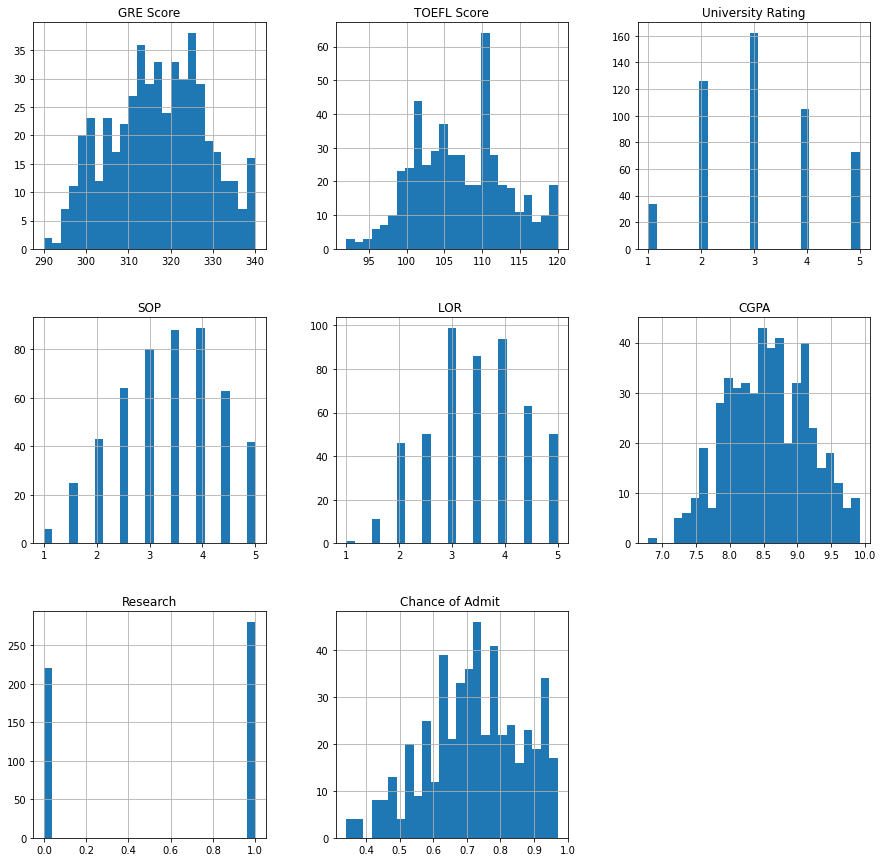

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)

# Definición de variable de interés (y)
Y = pd.DataFrame(data[data.columns[-1]])

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [7]:
# Celda 1

# Normalización de variables predictoras (X) con la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)
xTrain = np.array(xTrain)
yTrain = np.array(yTrain)
xTest = np.array(xTest)
yTest = np.array(yTest)

# Definición de dimensiones de salida, varaibles de interés
output_var = yTrain.shape[1]
print(output_var, 'output variables')

# Definición de dimensiones de entrada, varaibles predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')

1 output variables
7 input variables


In [8]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


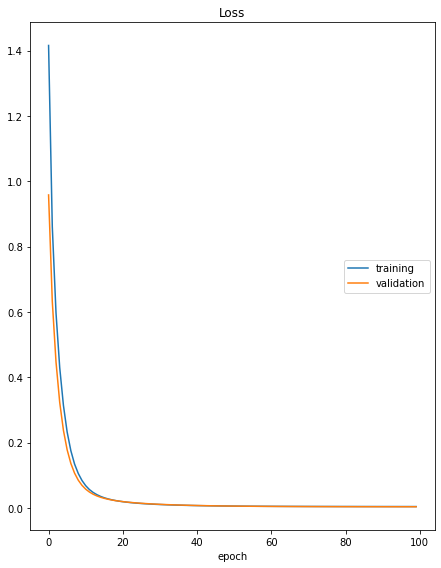

Loss
	training         	 (min:    0.004, max:    1.416, cur:    0.004)
	validation       	 (min:    0.003, max:    0.958, cur:    0.003)
11/11 [==============================] - 0s 21ms/step - loss: 0.0038 - val_loss: 0.0033


In [9]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=100, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [10]:
# Desempeño del modelo con error absoluto medio (MAE)
yPred = model.predict(xTest)
mae1=mean_absolute_error(yTest,yPred)
mae1

0.042092417478561406

In [11]:
# Desempeño del modelo con error cuadrático medio (MSE)
yPred = model.predict(xTest)
mse1=mean_squared_error(yTest,yPred)
mse1

0.0032858506204129652

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [12]:
# Celda 2

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(13, input_shape=(dims,), activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(output_var, activation='relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                104       
                                                                 
 dense_1 (Dense)             (None, 13)                182       
                                                                 
 dense_2 (Dense)             (None, 1)                 14        
                                                                 
Total params: 300
Trainable params: 300
Non-trainable params: 0
_________________________________________________________________
None


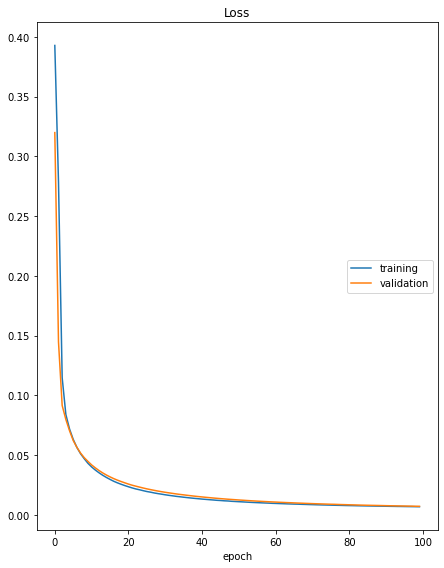

Loss
	training         	 (min:    0.007, max:    0.393, cur:    0.007)
	validation       	 (min:    0.007, max:    0.320, cur:    0.007)
11/11 [==============================] - 0s 33ms/step - loss: 0.0068 - val_loss: 0.0071


In [13]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=100, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [14]:
# Desempeño del modelo con error absoluto medio (MAE)
yPred = model.predict(xTest)
mae2=mean_absolute_error(yTest,yPred)
mae2

0.06485398734410604

In [15]:
# Desempeño del modelo con error cuadrático medio (MSE)
yPred = model.predict(xTest)
mse2=mean_squared_error(yTest,yPred)
mse2

0.007141533799580604

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [16]:
# Celda 3

# Red neuronal multicapa con early stopping
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dropout(0.5, input_shape=(dims,)))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(output_var, activation='relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 dense (Dense)               (None, 13)                104       
                                                                 
 dense_1 (Dense)             (None, 13)                182       
                                                                 
 dense_2 (Dense)             (None, 13)                182       
                                                                 
 dense_3 (Dense)             (None, 13)                182       
                                                                 
 dense_4 (Dense)             (None, 13)                182       
                                                                 
 dense_5 (Dense)             (None, 1)                 1

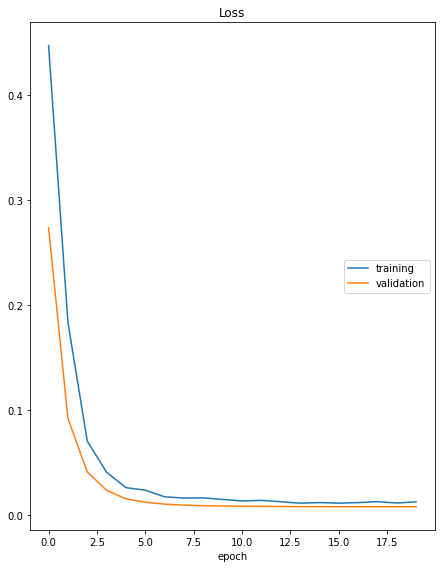

Loss
	training         	 (min:    0.011, max:    0.447, cur:    0.013)
	validation       	 (min:    0.008, max:    0.273, cur:    0.008)
11/11 [==============================] - 0s 22ms/step - loss: 0.0126 - val_loss: 0.0080
Epoch 20: early stopping


In [17]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento de la red neuronal con 50 épocas y early stopping
model.fit(xTrain, yTrain,
          verbose=1,
          epochs=100,
          validation_data=(xTest, yTest),
          callbacks=[best_model, early_stop, PlotLossesKeras()])

In [18]:
# Desempeño del modelo con error absoluto medio (MAE)
yPred = model.predict(xTest)
mae3=mean_absolute_error(yTest,yPred)
mae3

0.06768512725830078

In [19]:
# Desempeño del modelo con error cuadrático medio (MSE)
yPred = model.predict(xTest)
mse3=mean_squared_error(yTest,yPred)
mse3

0.007954452089666043

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

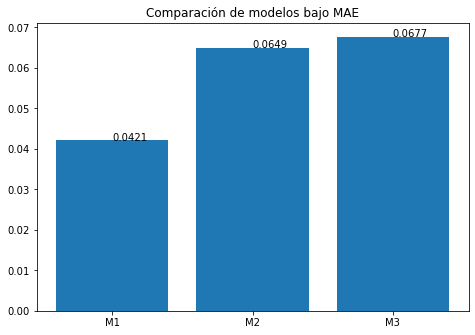

In [20]:
# Celda 4

# Generación de gráfica comparativa de modelos bajo MAE
mae1r = round(mae1, 4)
mae2r = round(mae2, 4)
mae3r = round(mae3, 4)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Comparación de modelos bajo MAE')
ejeX = ['M1', 'M2', 'M3']
ejeY = [mae1r, mae2r, mae3r]
ax.bar(ejeX, ejeY)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], y[i])
addlabels(ejeX, ejeY, plt)
plt.show()

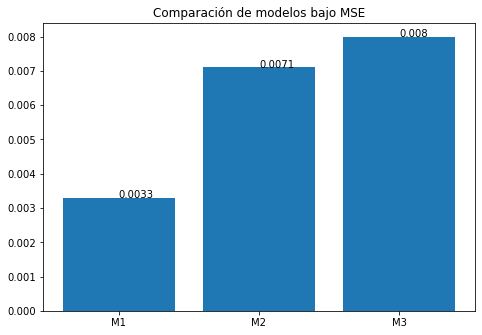

In [21]:
# Generación de gráfica comparativa de modelos bajo MSE
mse1r = round(mse1, 4)
mse2r = round(mse2, 4)
mse3r = round(mse3, 4)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title('Comparación de modelos bajo MSE')
ejeX = ['M1', 'M2', 'M3']
ejeY = [mse1r, mse2r, mse3r]
ax.bar(ejeX, ejeY)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], y[i])
addlabels(ejeX, ejeY, plt)
plt.show()

Para todos los modelos se utilizaron los mismos parámetros:
* El MSE como función de pérdida ya que es la función por defecto para problemas de regresión
* El Stochastic Gradient Descent (SGD) como optimizador ya que además de ser el método por defecto, funciona muy bien para sets de datos pequeños
* 100 iteraciones o épocas como número estándar para evitar overfitting, considerando que estamos entrenando el modelo con un set de datos pequeño
* 13 nodos o neuronas bajo la rule-of-thumb que establece que este número debe ser menor al doble de los nodos de entrada (7)

Al comparar los modelos por las métricas MAE y MSE vemos que el mejor de ellos es la red neuronal de una capa (M1). La ventaja más relevante de éste, al ser la representación más básica de una red neuronal, es que requiere de menor poder computacional en comparación con modelos que usan más de una capa oculta.

La principal desventaja del modelo con el menor rendimiento (multicapas usando early stopping y dropout) es que el uso de más capas ocultas requiere de mayor poder computacional, sin embargo, las técnicas usadas para prevenir el overfitting (evitando que el error de entrenamiento se aleje del error de validación) ayudan a hacer un uso más eficiente de los recursos de computo, lo cual es más notorio con sets de datos más grandes.